# Installing required libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
colnames=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreefunction','Age','Diabetes']

In [5]:
df=pd.read_csv('/content/pima-indians-diabetes.csv',names=colnames,header=None)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreefunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreefunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.Diabetes.value_counts()

0    500
1    268
Name: Diabetes, dtype: int64

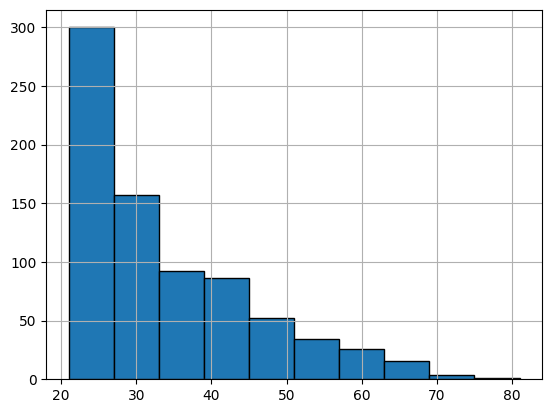

In [11]:
df["Age"].hist(edgecolor = "black");

In [12]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 81 Min Age: 21


<ipython-input-14-16a9458cfdc9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age, bins = 20, ax=ax[0,0])
<ipython-input-14-16a9458cfdc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1])
<ipython-input-14-16a9458cfdc9>:4: UserWarning: 

`distplot` is 

<Axes: xlabel='BMI', ylabel='Density'>

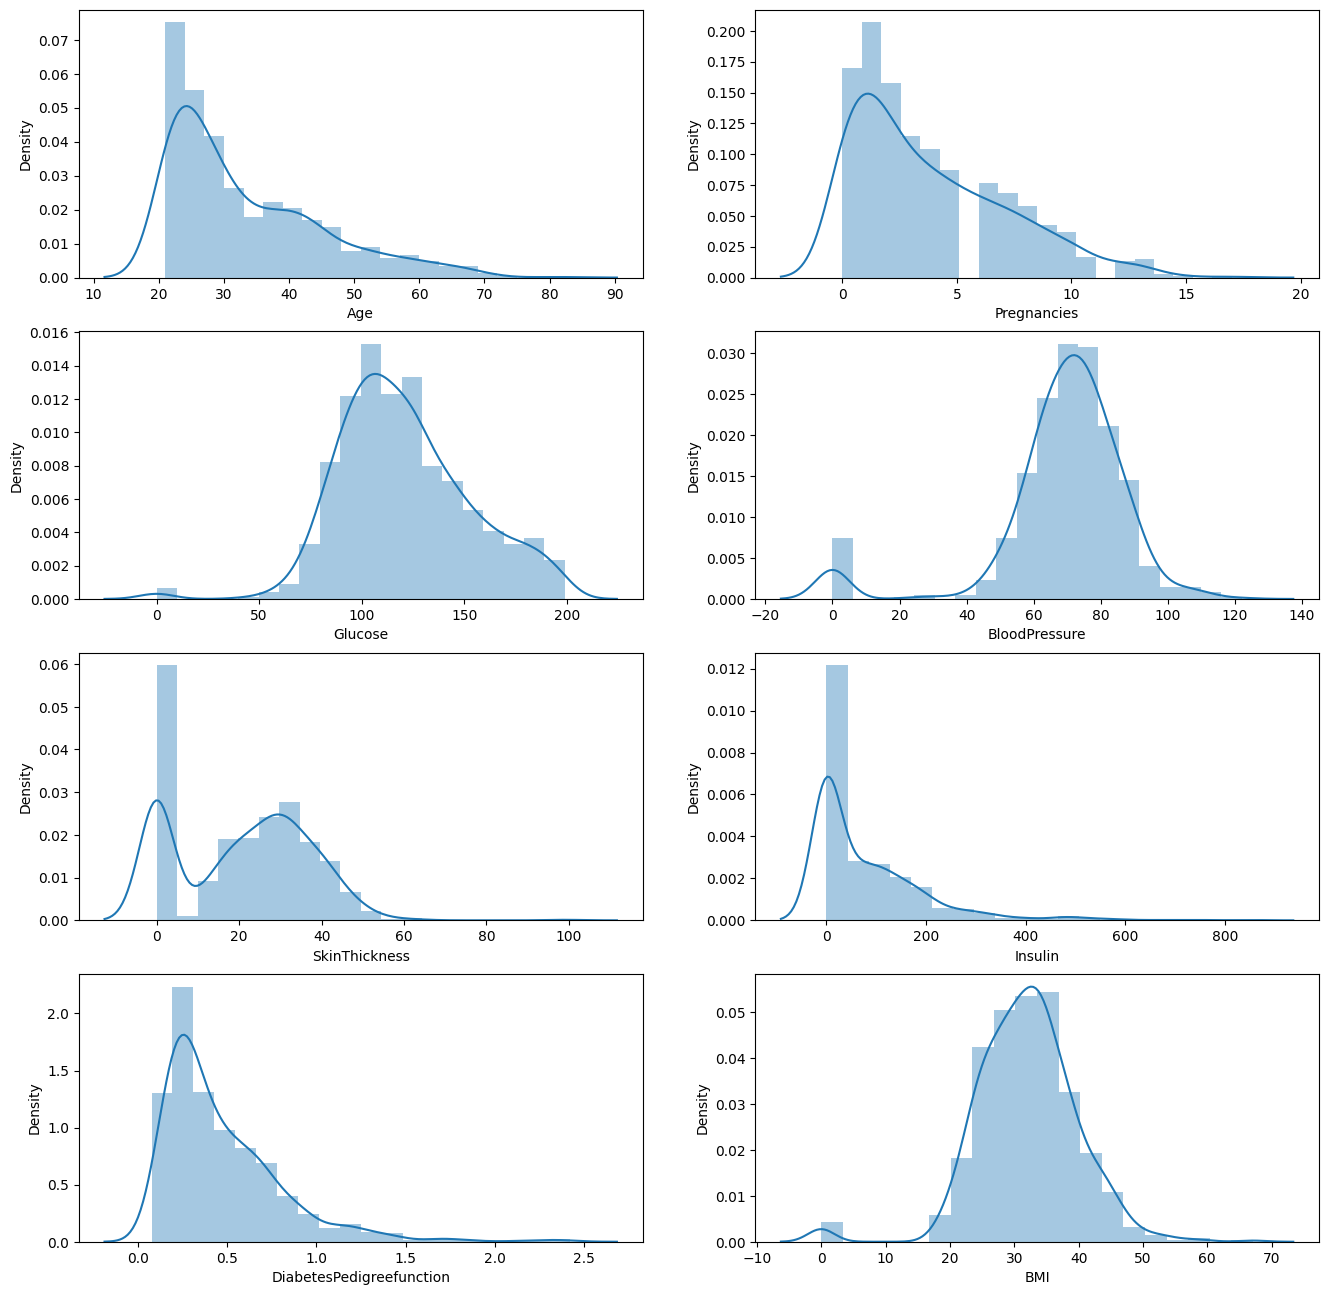

In [14]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0])
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1])
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0])
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1])
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreefunction, bins = 20, ax=ax[3,0])
sns.distplot(df.BMI, bins = 20, ax=ax[3,1])

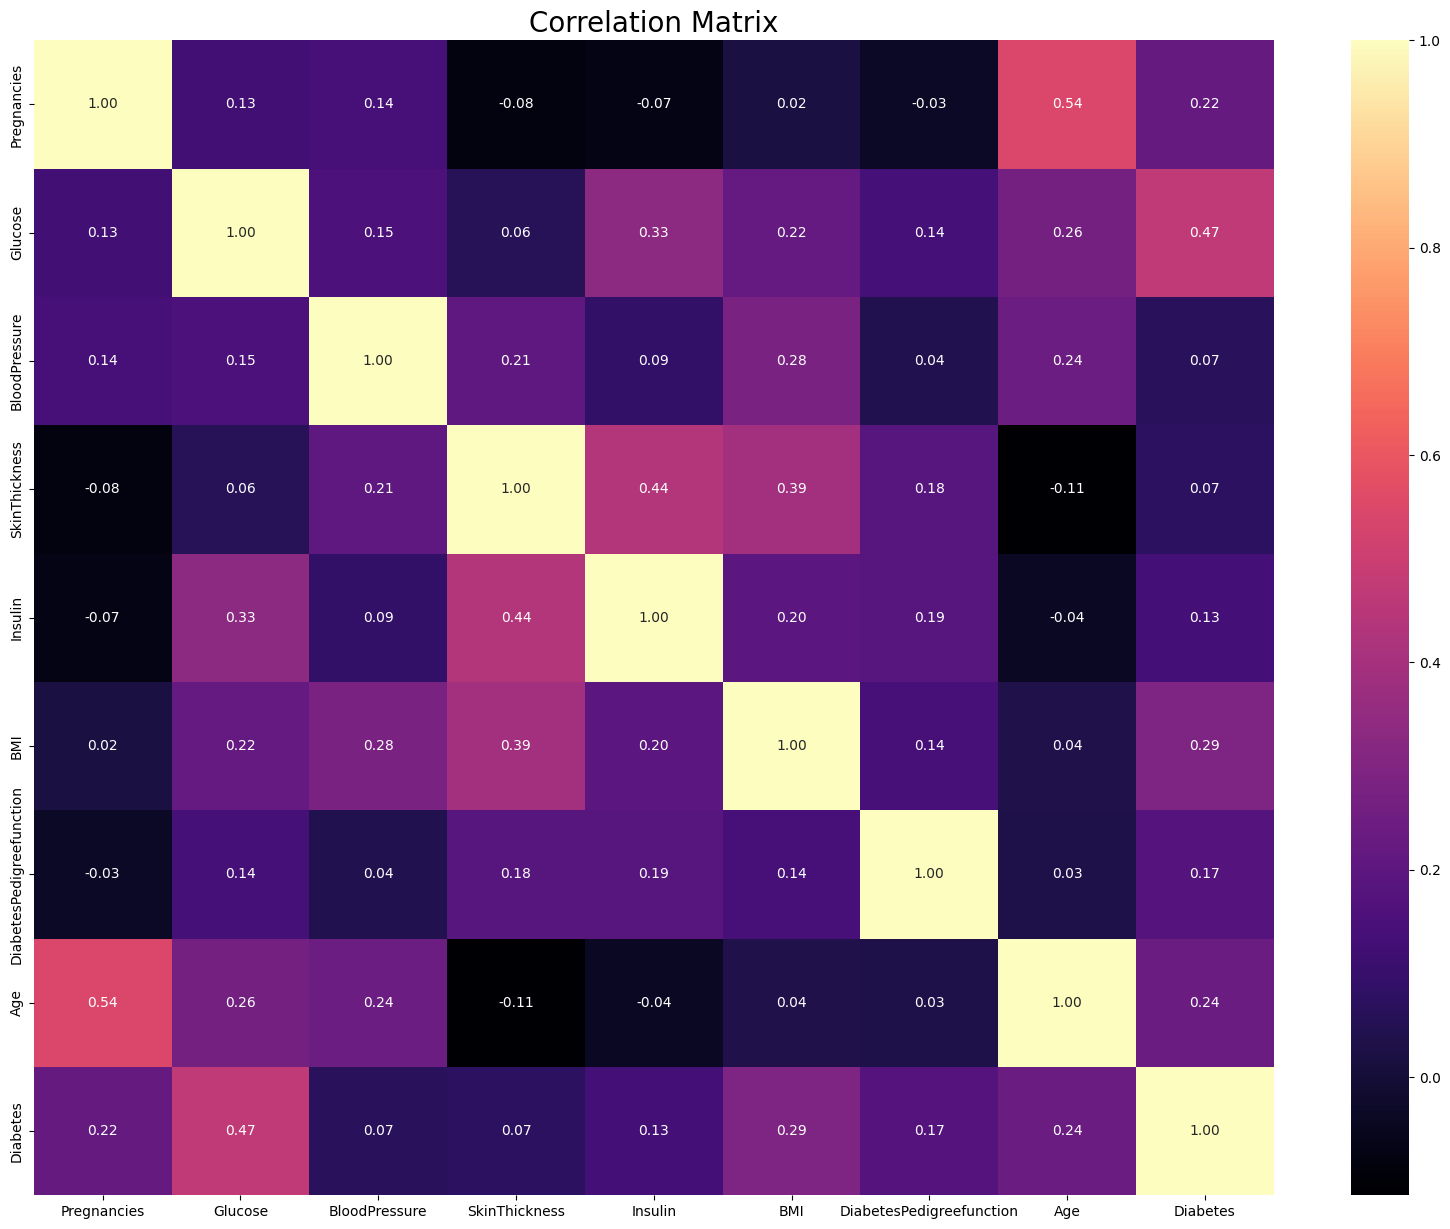

In [17]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [18]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [19]:
# Now, we can look at where are missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreefunction      0
Age                           0
Diabetes                      0
dtype: int64

In [20]:
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Diabetes']].groupby(['Diabetes'])[[var]].median().reset_index()
    return temp

In [21]:
columns = df.columns
columns = columns.drop("Diabetes")
for i in columns:
    median_target(i)
    df.loc[(df['Diabetes'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Diabetes'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreefunction,Age,Diabetes
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreefunction    0
Age                         0
Diabetes                    0
dtype: int64

# Outlier detection and removal


In [24]:
for feature in df:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreefunction yes
Age yes
Diabetes no


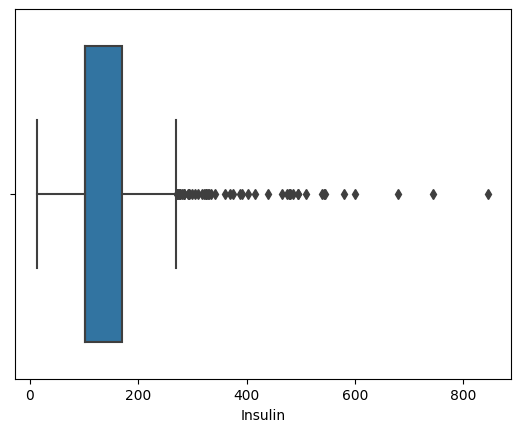

In [25]:
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

In [26]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

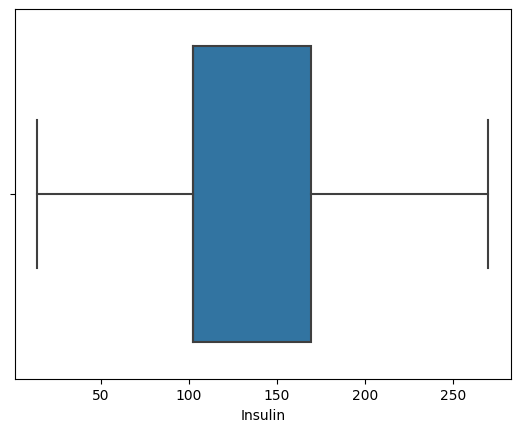

In [27]:
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

In [29]:
y=df['Diabetes']
X=df.drop('Diabetes',axis=1)

In [30]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreefunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [33]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [34]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

array([[-0.84466975, -0.69710068, -0.00876762, ..., -1.05748694,
         0.5366396 , -0.43171756],
       [-0.25059503,  2.29558495, -0.35056547, ..., -0.2266147 ,
        -0.53398763,  0.08265744],
       [-0.25059503, -1.4206071 , -0.17966654, ...,  0.01077737,
        -0.62047284,  0.51130327],
       ...,
       [-0.54763239, -0.43400744, -0.86326224, ..., -1.07232395,
        -1.04395213, -1.03182173],
       [ 0.04644232, -0.23668751, -0.69236331, ..., -0.52335479,
        -1.04991662, -0.77463423],
       [ 1.53162911,  1.44053191,  1.35842378, ..., -0.30079972,
        -0.52504088,  1.36859494]])

#Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boost
clf=GradientBoostingClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8636363636363636

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.94      0.90       101
           1       0.86      0.72      0.78        53

    accuracy                           0.86       154
   macro avg       0.86      0.83      0.84       154
weighted avg       0.86      0.86      0.86       154



#XG Boost

In [38]:
from xgboost import XGBClassifier

# Create a XGBoost classifier object
xgb_clf= XGBClassifier()

# Train the classifier on the training data
xgb_clf.fit(X_train, y_train)

# Make predictions on the test data
Y_pred_xgb = xgb_clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred_xgb))


              precision    recall  f1-score   support

           0       0.85      0.97      0.91       101
           1       0.92      0.68      0.78        53

    accuracy                           0.87       154
   macro avg       0.89      0.82      0.85       154
weighted avg       0.88      0.87      0.86       154



In [39]:
accuracy_score(y_test,Y_pred_xgb)

0.8701298701298701

In [41]:
import pickle
pickle.dump(xgb_clf,open('model.pkl','wb'))